In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets 
from IPython.display import display 
import pylab
from sklearn.compose import ColumnTransformer
import sklearn
import keras.layers as kl
from numpy import genfromtxt
from numpy import asarray
from numpy import savetxt
import networkx as nx

In [2]:
df_arsenic_prelim = pd.read_csv (r'C:\Users\Ryan\Desktop\Summer research\Data\Prelim-data\as.csv')

In [3]:
df_arsenic_prelim

,SiteID,As,X_Albers,Y_Albers,WellDepth,AvgAnnualN_CAFO_1992_97,AvgAnnualN_Fert_1992_2001,AWC,AWS25,BFI,...,Transmiss,TWI,VRT,VWC,YngWtrMeanAge,YngWtrMeanAge_VertMean,DTW,Data,as10,Pred
0,1,6.0,924000.0,2006000.0,105.912831,16.678065,48.483771,0.141277,5.384314,21.0,...,143.362904,9.902970,5.956547,0.304000,23.158235,17.689265,3.082386,train,0.0,0.00
1,2,1.0,892000.0,2080000.0,54.861323,7.688502,50.638261,0.217775,7.311919,37.0,...,137.152244,9.067347,4.196766,0.343552,22.015855,17.739371,3.076582,train,0.0,0.06
2,3,13.0,886000.0,2066000.0,34.745504,6.245885,43.503552,0.140200,5.400000,33.0,...,121.646066,11.470297,17.558480,0.270166,17.762669,15.950136,5.645093,train,1.0,0.83
3,4,1.0,898000.0,2076000.0,59.737885,4.900404,34.132068,0.154753,5.318469,37.0,...,298.232568,9.815662,1.231952,0.328985,27.709500,17.589893,1.044807,train,0.0,0.03
4,5,2.0,896000.0,2062000.0,45.717769,6.511748,45.355325,0.140200,5.400000,28.0,...,97.123320,9.435353,21.539828,0.268193,19.238581,14.557619,8.535328,train,0.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,1.0,610000.0,2484000.0,19.506248,8.030330,10.843744,0.159466,4.090000,59.0,...,115.224598,13.790910,0.416030,0.344196,8.765928,16.686542,0.188501,test,0.0,0.11
9998,9999,6.0,616000.0,2526000.0,24.992380,0.158934,0.199489,0.126106,4.030000,63.0,...,40.882361,11.154347,1.048951,0.253424,15.627269,11.281490,1.518130,test,0.0,0.01
9999,10000,0.0,602000.0,2586000.0,26.211521,0.004975,0.015434,0.126106,4.030000,66.0,...,59.112810,13.113131,0.520421,0.280687,21.815356,15.832110,0.643534,test,0.0,0.05
10000,10001,0.0,668000.0,2620000.0,12.496190,0.028986,0.058744,0.066700,2.000000,62.0,...,59.639661,12.550000,0.098656,0.367925,5.079691,14.141643,0.114506,test,0.0,0.01


In [4]:
df_arsenic_prelim.isnull().values.any()
df_arsenic_prelim.isnull().sum()
df_arsenic_prelim = df_arsenic_prelim.dropna()

In [5]:
correlation_matrix_recovered = genfromtxt(r'C:\Users\Ryan\Desktop\Summer research\Data\Prelim-data\Pearson_correlation_matrix.csv', delimiter=',')

In [6]:
euclidean_matrix_recovered = genfromtxt(r'C:\Users\Ryan\Desktop\Summer research\Data\Prelim-data\euclidean_dist_matrix.csv', delimiter=',')

In [7]:
print("the Minimum Euclidean distance obtained is: ",np.min(euclidean_matrix_recovered))
print("the Maximum Euclidean distance obtained is: ",np.max(euclidean_matrix_recovered))
euclidean_matrix_recovered.shape

the Minimum Euclidean distance obtained is:  0.0
the Maximum Euclidean distance obtained is:  4159862.016942389


(7616, 7616)

In [8]:
correlation_matrix_recovered
print("the Minimum correlation obtained is: ",np.min(correlation_matrix_recovered))
print("the Maximum correlation obtained is: ",np.max(correlation_matrix_recovered))
correlation_matrix_recovered.shape

the Minimum correlation obtained is:  -0.07761449873631861
the Maximum correlation obtained is:  1.0


(7616, 7616)

In [9]:
cutoff_euclidean = 10000
cutoff_correlation = 0.95

In [10]:
num=0
Edge_matrix = np.zeros((df_arsenic_prelim.shape[0],df_arsenic_prelim.shape[0]))
for i in range(df_arsenic_prelim.shape[0]):
    for j in range(df_arsenic_prelim.shape[0]):
        if i!=j and correlation_matrix_recovered[i,j] > cutoff_correlation or euclidean_matrix_recovered[i,j] < cutoff_euclidean:
            Edge_matrix[i,j]=1
            num+=1
print(num)

146006


In [11]:
G = nx.from_numpy_matrix(Edge_matrix)
n = G.number_of_nodes()
m = G.number_of_edges()
print(n,m)

7616 76811


In [12]:
def Degree_Distribution(G):
    degree = G.degree()
    degree = [ deg for (v,deg) in degree ]
    sum_degree = np.sum(degree)
    plot_distribution(degree, xlabel='Degree ($k$)', 
                  ylabel='Number of nodes with degree $k$ ($N_k$)', title='Degree distributions')
    return sum_degree

In [13]:
# Input: A graph 
# Find the sizes of all connected components and plot the distribution
def CC_Distribution(G):
    cc_sorted = sorted(nx.connected_components(G), key=len, reverse=True)
    # print statistics of the top 5 components (if exist)
    topcc = min(len(cc_sorted), 5)
    for i in  range(topcc):
        cc = cc_sorted[i]
        cc_graph = G.subgraph(cc)
        n = cc_graph.number_of_nodes()
        m = cc_graph.number_of_edges()
        n_percent = (n/G.number_of_nodes()) * 100
        print("Largest component #", i+1)
        print("Number of vertices:", n, " (", n_percent, ")", "\nNumber of edges: ", m, "\n")
        if i == 0:
            size_of_largest_component = n

    cc_sizes = [len(c) for c in cc_sorted]
    plot_distribution(cc_sizes, xlabel='Weakly connected component size', 
                  ylabel='Count', title='Connected component size distributions')
    return size_of_largest_component

In [14]:
# Input: A graph 
# Find the local clustering coefficient of all vertices and plot distribution
def Clustering_Analysis(G):
    clust = nx.clustering(G)
    local_clust_coefficient = [ v for v in clust.values() ]
    avg_clust_coefficient = sum(local_clust_coefficient)/G.number_of_nodes()
    print("Average clustering coefficient: ", avg_clust_coefficient)
    #plot the distribution of clustering coefficient
    plot_distribution(local_clust_coefficient, xlabel='Clustering coefficient', 
                  ylabel='Number of vertices', title='Clustering coefficient distributions',
                      xlog=False, ylog=True, showLine=False)
    return avg_clust_coefficient

In [15]:
def ShortestPaths_Analysis(G):
    cc_sorted = sorted(nx.connected_components(G), key=len, reverse=True)

    # find shortest paths in top 5 components
    topcc = min(len(cc_sorted), 5)
    for i in  range(topcc) :
        cc = cc_sorted[i]
        cc_graph = G.subgraph(cc)
      
        if(len(cc)>30000):
            print("This component is too large. Using ten single-source shortest paths.")
            cc = list(cc)
            cc_graph = G.subgraph(cc)
            shortest_path_lens = []
            for i in range(10):
                length = nx.single_source_shortest_path_length(cc_graph, cc[i]) 
                shortest_path_lens += [ v for v in length.values() ]
        else:
            all_shortest_path_dict = dict(nx.all_pairs_shortest_path_length(cc_graph))
            shortest_path_lens = []
            for val1 in all_shortest_path_dict.values():
                for val in val1.values():
                    shortest_path_lens.append(val)
        
        average_shortest_path_lenght = np.average(shortest_path_lens)
        diameter_of_graph = np.max(shortest_path_lens)
        print(average_shortest_path_lenght,diameter_of_graph)
        plot_distribution(shortest_path_lens, xlabel='Shortest path lengths (hops)', 
                  ylabel='Number of paths', title='Shortest path lengths distributions',
                      xlog=False, ylog=False, showLine=True, intAxis=True)  
        return(average_shortest_path_lenght,diameter_of_graph)

In [16]:
def plot_distribution (data, xlabel='', ylabel='', title='', xlog = True, ylog= True, showLine=False, intAxis=False) :
    counts = {}
    for item in data :
        if item not in counts :
            counts [ item ] = 0
        counts [ item ] += 1
    counts = sorted ( counts.items () )
    fig = plt.figure ()
    ax = fig.add_subplot (111)
    ax.scatter ([ k for (k , v ) in counts ] , [ v for (k , v ) in counts ])
    if(len(counts)<20):  # for tiny graph
        showLine=True
    if showLine==True:
        ax.plot ([ k for (k , v ) in counts ] , [ v for (k , v ) in counts ])
    if xlog == True:
        ax.set_xscale ( 'log')
    if ylog == True:
        ax.set_yscale ( 'log')
    if intAxis == True:
        gca = fig.gca()
        gca.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_xlabel ( xlabel)
    ax.set_ylabel ( ylabel )
    plt.title ( title )
    #fig.savefig ( "degree_distribution.png" )
    
def plot_degree_bar (G) :
    degs = {}
    for n in G.nodes () :
        deg = G.degree ( n )
        if deg not in degs :
            degs [ deg ] = 0
        degs [ deg ] += 1
    items = sorted ( degs.items () )
    fig = plt.figure ()
    ax = fig.add_subplot (111)
    print(items)
    ax.bar([ k for (k , v ) in items ] , [ v for (k , v ) in items ])
    ax.set_xlabel ( 'Degree ($k$)')
    ax.set_ylabel ( 'Number of nodes with degree $k$ ($N_k$)')

Largest component # 1
Number of vertices: 1102  ( 14.469537815126051 ) 
Number of edges:  32788 

Largest component # 2
Number of vertices: 267  ( 3.50577731092437 ) 
Number of edges:  3610 

Largest component # 3
Number of vertices: 245  ( 3.2169117647058822 ) 
Number of edges:  7844 

Largest component # 4
Number of vertices: 217  ( 2.849264705882353 ) 
Number of edges:  2918 

Largest component # 5
Number of vertices: 193  ( 2.534138655462185 ) 
Number of edges:  1021 

Average clustering coefficient:  0.6324684002337135


0.6324684002337135

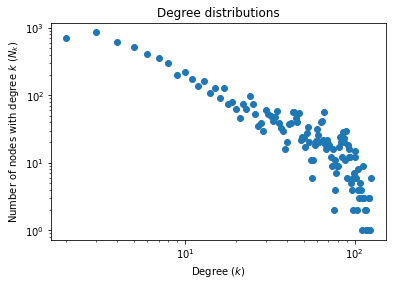

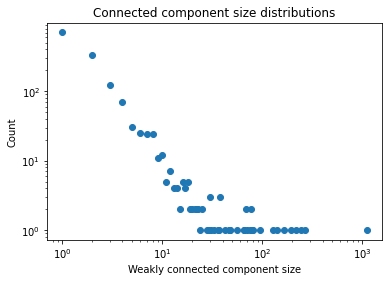

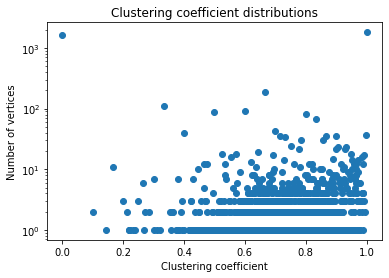

In [17]:
Degree_Distribution(G)
CC_Distribution(G)
Clustering_Analysis(G)

In [19]:
import dgl
import tensorflow as tf

dataset = dgl.data.CoraGraphDataset()

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)
Extracting file to C:\Users\Ryan\.dgl\cora_v2
Finished data loading and preprocessing.
  NumNodes: 2708
  NumEdges: 10556
  NumFeats: 1433
  NumClasses: 7
  NumTrainingSamples: 140
  NumValidationSamples: 500
  NumTestSamples: 1000
Done saving data into cached files.


In [21]:
g = dataset[0]
g = dataset[0]

train_ds = tf.data.Dataset.zip((
    tf.data.Dataset.from_tensor_slices(g.ndata['feat'][g.ndata['train_mask']]),
    tf.data.Dataset.from_tensor_slices(g.ndata['label'][g.ndata['train_mask']])
)).batch(64)
val_ds = tf.data.Dataset.zip((
    tf.data.Dataset.from_tensor_slices(g.ndata['feat'][g.ndata['val_mask']]),
    tf.data.Dataset.from_tensor_slices(g.ndata['label'][g.ndata['val_mask']])
)).batch(64)
test_ds = tf.data.Dataset.zip((
    tf.data.Dataset.from_tensor_slices(g.ndata['feat'][g.ndata['test_mask']]),
    tf.data.Dataset.from_tensor_slices(g.ndata['label'][g.ndata['test_mask']])
)).batch(64)

AttributeError: 'BatchDataset' object has no attribute 'shape'